## Mahdi Anvari 610700002 Homework 2 of Machine Learning Question 3

In [96]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics
from sklearn.decomposition import PCA

a. Perform clustering (with 2 and 3 clusters) on the samples and compare the results 
to Project and Tissue label in the annotation file.

In [97]:
AnnotationDF = pd.read_csv("Leaf_Root_annotation.csv")
RawDF = pd.read_csv("Leaf_Root_raw_data.csv")
NormalizedDF = pd.read_csv("Leaf_Root_normalized_data.csv")
#print(AnnotationDF.shape)
#print(RawDF.shape)
#print(NormalizedDF.shape)

Projects = AnnotationDF.values[:,1]
Tissues = AnnotationDF.values[:,4]
print(Tissues)
print(Projects)

RawNP = RawDF.values
RawData = np.transpose(RawNP[:,1:])
NormalizedNP = NormalizedDF.values
NormalizedData = np.transpose(NormalizedNP[:,1:])

['Leaf' 'Leaf' 'Leaf' 'Leaf' 'Root' 'Root' 'Root' 'Root' 'Leaf' 'Root'
 'Leaf' 'Leaf' 'Root' 'Root' 'Root' 'Root' 'Root' 'Leaf' 'Leaf' 'Leaf'
 'Leaf' 'Leaf' 'Leaf' 'Root' 'Root' 'Root']
['PRJNA493167' 'PRJNA493167' 'PRJNA493167' 'PRJNA493167' 'PRJNA493167'
 'PRJNA493167' 'PRJNA493167' 'PRJNA493167' 'PRJNA661543' 'PRJNA661543'
 'PRJNA661543' 'PRJNA661543' 'PRJNA661543' 'PRJNA661543' 'PRJNA730337'
 'PRJNA730337' 'PRJNA730337' 'PRJNA730337' 'PRJNA730337' 'PRJNA730337'
 'PRJNA730337' 'PRJNA730337' 'PRJNA730337' 'PRJNA730337' 'PRJNA730337'
 'PRJNA730337']


In [98]:
# for raw data
Kmeans2 = KMeans(n_clusters=2, n_init=10)
Kmeans3 = KMeans(n_clusters=3, n_init=10)
Clusters2 = Kmeans2.fit_predict(RawData)
Clusters3 = Kmeans3.fit_predict(RawData)
print(Clusters2)
print(Clusters3)
ari2 = adjusted_rand_score(Tissues,Clusters2)
ari3 = adjusted_rand_score(Projects,Clusters3)
print("For raw data:")
print("Adjusted Rand Index of Kmeans based on tissues is",ari2)
print("Adjusted Rand Index of Kmeans based on projects is",ari3)

[0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1]
[2 0 2 2 2 2 2 2 0 2 0 0 2 2 1 1 1 0 0 0 0 0 0 1 1 1]
For raw data:
Adjusted Rand Index of Kmeans based on tissues is 1.0
Adjusted Rand Index of Kmeans based on projects is 0.30347192456065153


In [99]:
# for normalized data
Kmeans2 = KMeans(n_clusters=2, n_init=10)
Kmeans3 = KMeans(n_clusters=3, n_init=10)
Clusters2 = Kmeans2.fit_predict(NormalizedData)
Clusters3 = Kmeans3.fit_predict(NormalizedData)
print(Clusters2)
print(Clusters3)
ari2 = adjusted_rand_score(Tissues,Clusters2)
ari3 = adjusted_rand_score(Projects,Clusters3)
print("For normalized data:")
print("Adjusted Rand Index of Kmeans based on tissues is",ari2)
print("Adjusted Rand Indexof Kmeans based on projects is",ari3)

[1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0]
[0 0 0 0 1 1 1 1 0 1 0 0 1 1 2 2 2 0 0 0 0 0 0 2 2 2]
For normalized data:
Adjusted Rand Index of Kmeans based on tissues is 1.0
Adjusted Rand Indexof Kmeans based on projects is 0.1332969363542826


b. Perform PCA, and color the samples once with Project label and once with the 
Tissue label.

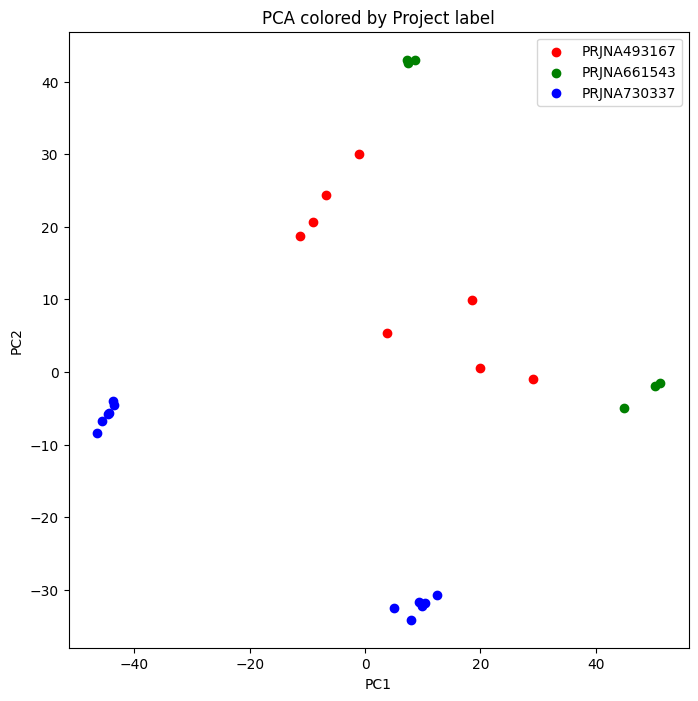

In [100]:
# for raw data
pca = PCA(n_components=20)
pcaResult = pca.fit_transform(RawData)
#print(pcaResult.shape)

plt.figure(figsize=(8, 8))
for project, color in zip(np.unique(Projects), ['r', 'g', 'b']):
    idx = AnnotationDF['Project'] == project
    plt.scatter(pcaResult[idx, 0], pcaResult[idx, 1], c=color, label=project)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA colored by Project label')
plt.legend()
plt.show()

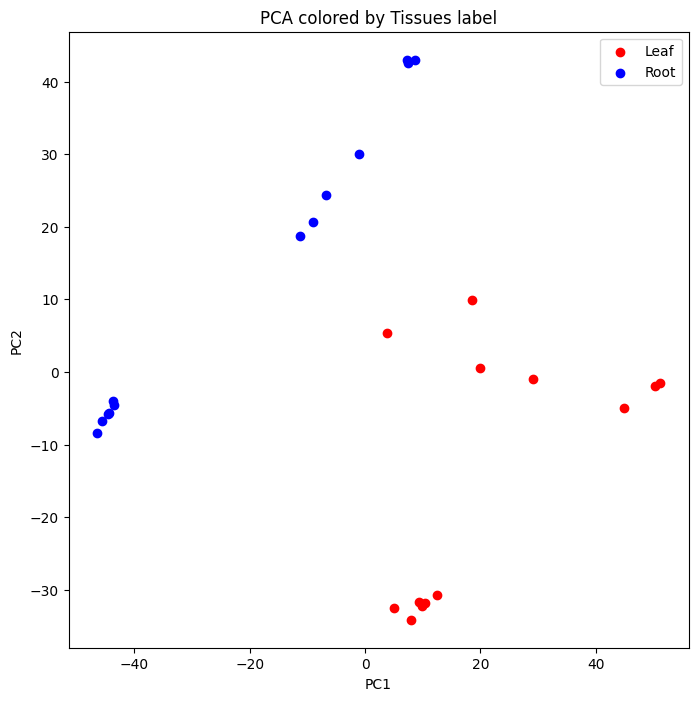

In [101]:
# for raw data
plt.figure(figsize=(8, 8))
for tissue, color in zip(np.unique(Tissues), ['r', 'b']):
    idx = AnnotationDF['Tissue'] == tissue
    plt.scatter(pcaResult[idx, 0], pcaResult[idx, 1], c=color, label=tissue)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA colored by Tissues label')
plt.legend()
plt.show()

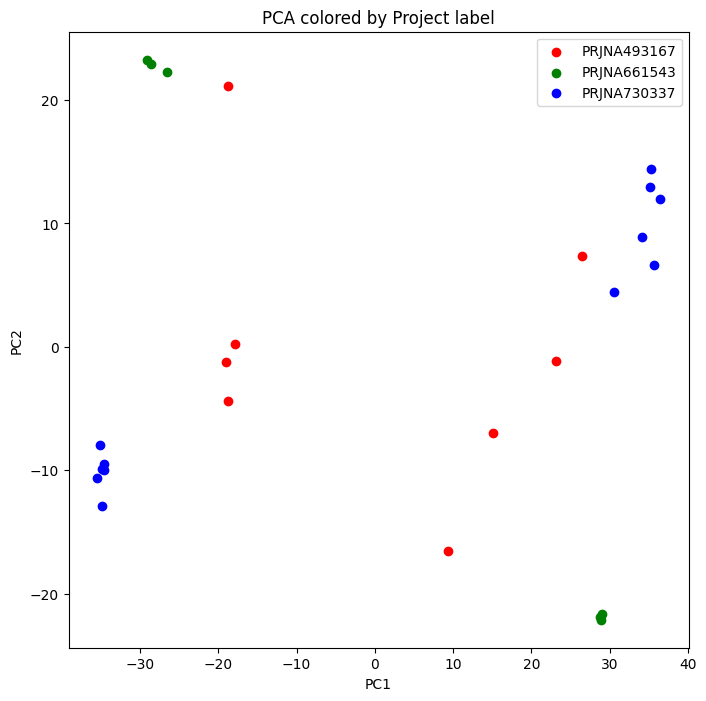

In [102]:
# for normalized data
pca = PCA(n_components=20)
pcaResult = pca.fit_transform(NormalizedData)
#print(pcaResult.shape)

plt.figure(figsize=(8, 8))
for project, color in zip(np.unique(Projects), ['r', 'g', 'b']):
    idx = AnnotationDF['Project'] == project
    plt.scatter(pcaResult[idx, 0], pcaResult[idx, 1], c=color, label=project)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA colored by Project label')
plt.legend()
plt.show()

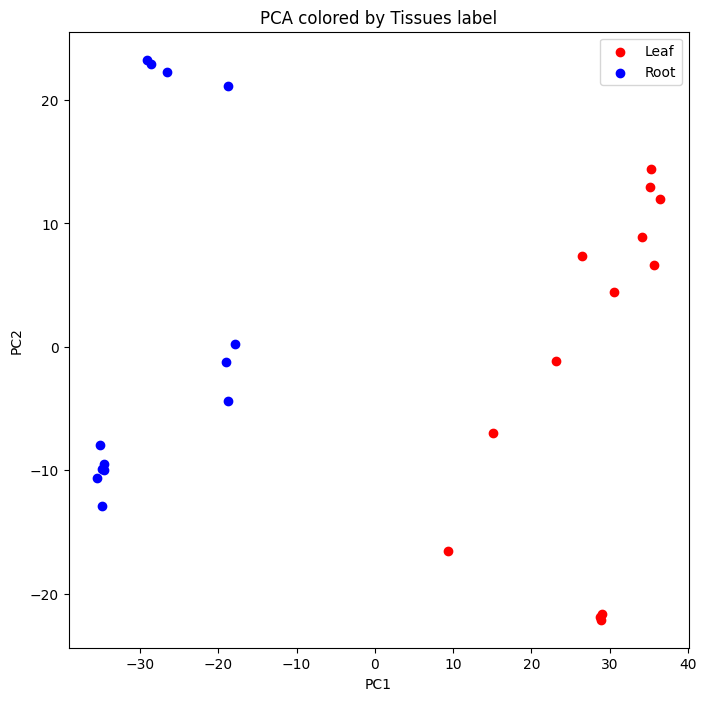

In [103]:
# for normalized data
plt.figure(figsize=(8, 8))
for tissue, color in zip(np.unique(Tissues), ['r', 'b']):
    idx = AnnotationDF['Tissue'] == tissue
    plt.scatter(pcaResult[idx, 0], pcaResult[idx, 1], c=color, label=tissue)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA colored by Tissues label')
plt.legend()
plt.show()